In [1]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [6]:
path = r'C:\Users\Admin\Desktop\Data-Science\Customer Churn\data\customer_churn.csv'
df = pd.read_csv(path)

print (df.shape)

(10000, 14)


In [7]:
# Load data
df.head(5)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [9]:
y = df["Exited"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [10]:
y_True = df["Exited"][df["Exited"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Exited"].shape[0]) * 100 ))

Churn Percentage = 20.369999999999997


## Descriptive Analysis

In [11]:
df.describe()

,Row,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Churn by Age

<Axes: xlabel='Age'>

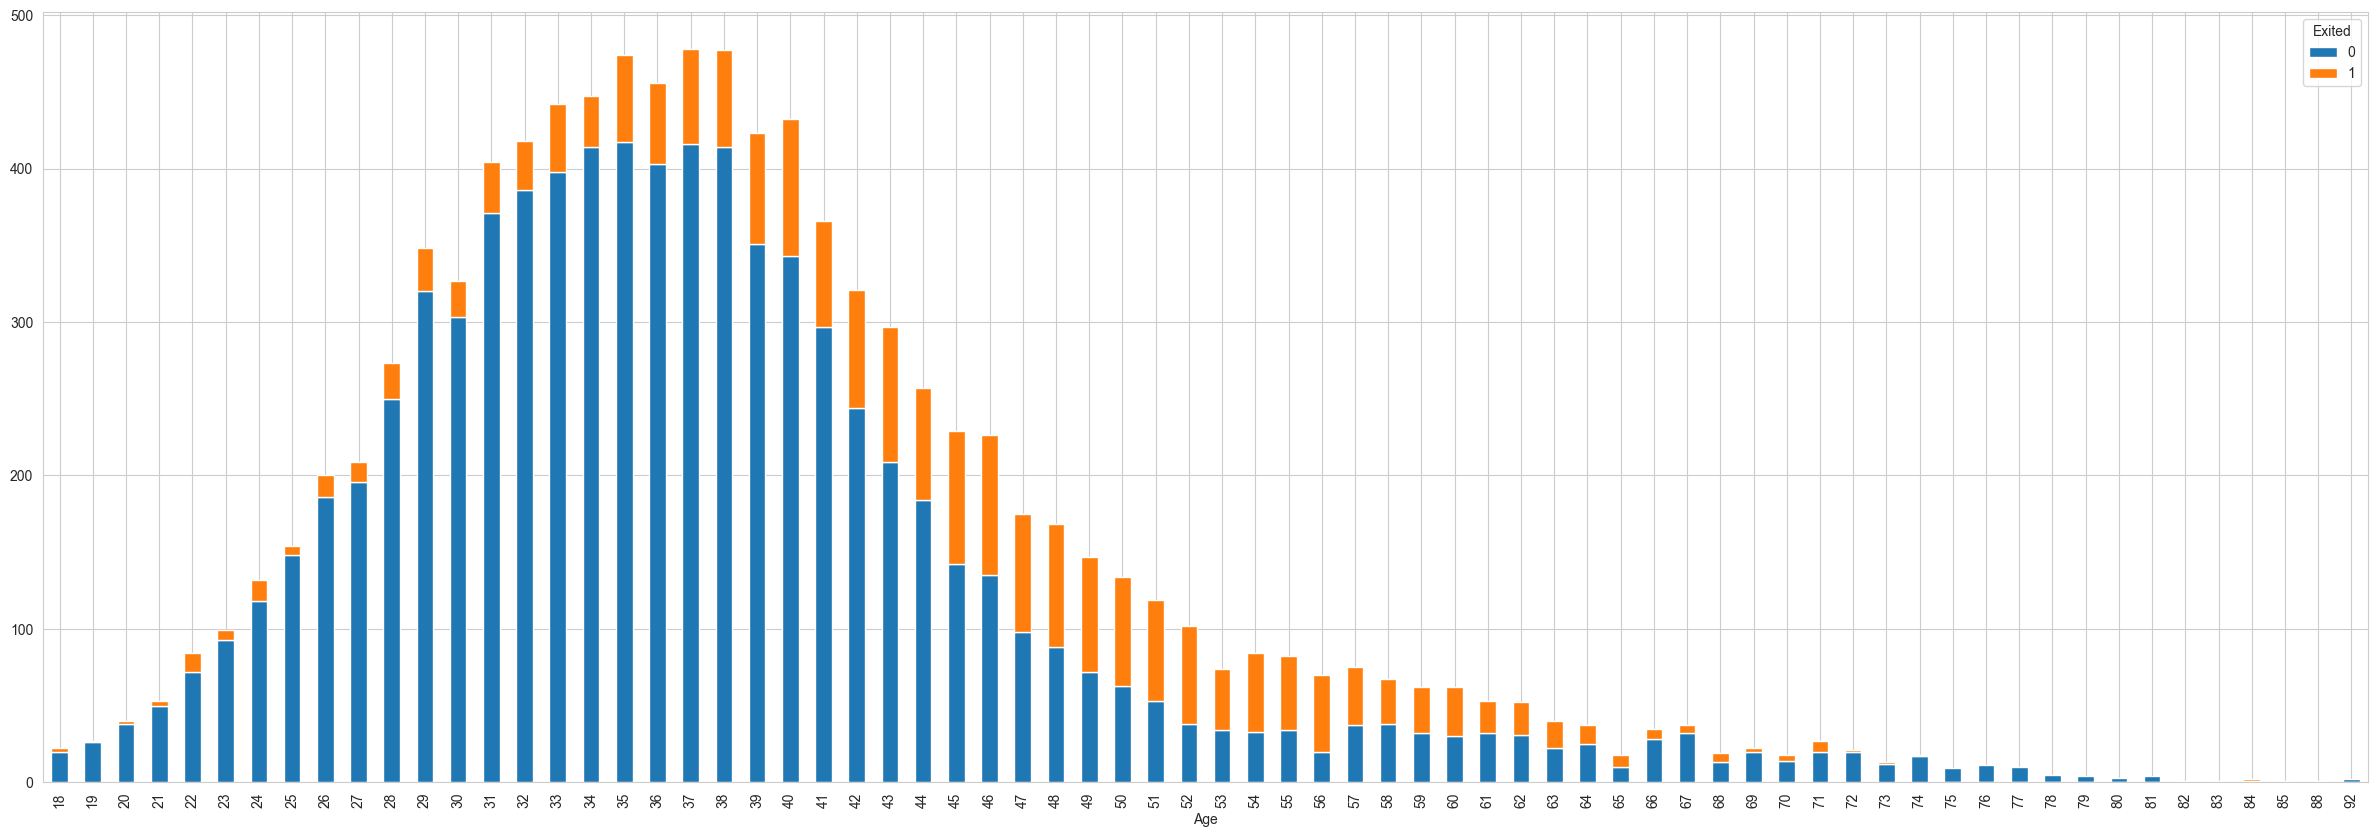

In [12]:
df.groupby(["Age", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

<Axes: xlabel='Age'>

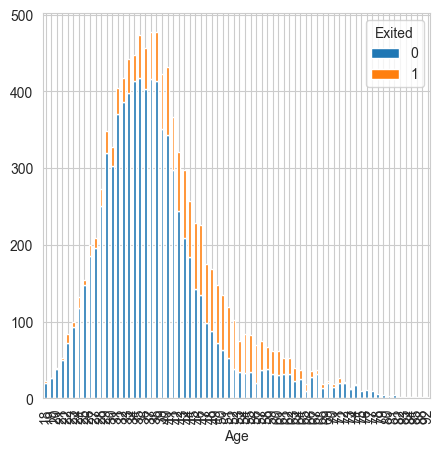

In [13]:
df.groupby(["Age", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<Axes: xlabel='Tenure'>

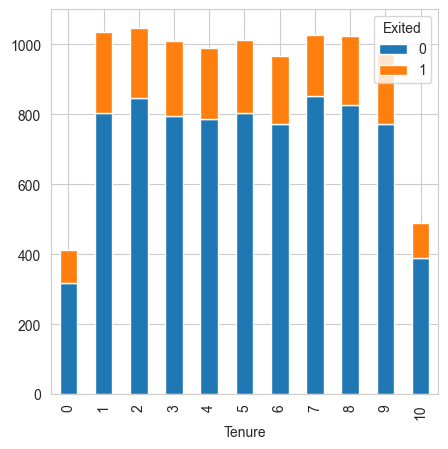

In [14]:
df.groupby(["Tenure", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<Axes: xlabel='Tenure'>

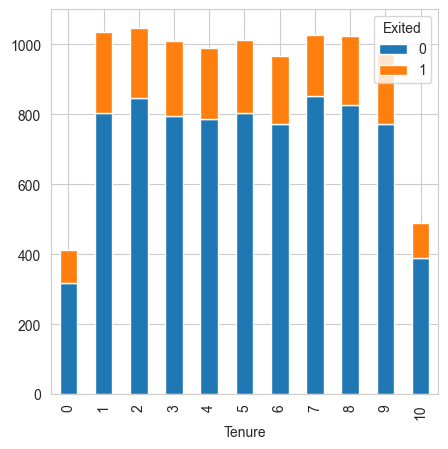

In [15]:
df.groupby(["Tenure", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<Axes: xlabel='Gender'>

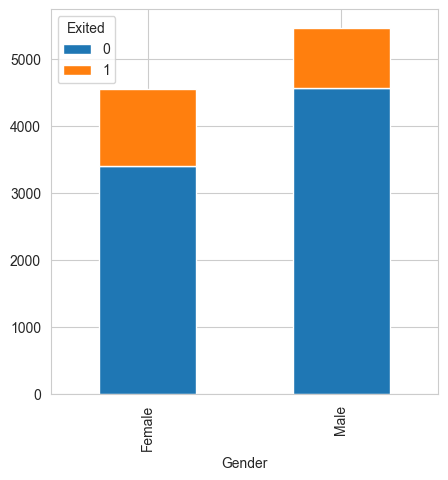

In [16]:
df.groupby(["Gender", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<Axes: xlabel='Nationality'>

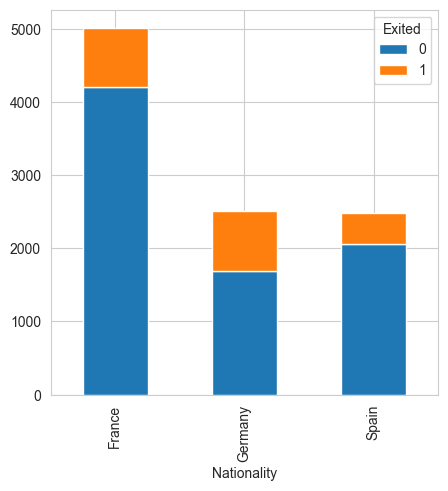

In [17]:
df.groupby(["Nationality", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [18]:
df.head(3)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## Data Quality checks

In [19]:
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


No missing values found!


In [20]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")


Number of duplicate records: 0


In [21]:
df.dtypes

Row              int64
Id               int64
Surname         object
Score            int64
Nationality     object
Gender          object
Age              int64
Tenure           int64
Balance        float64
Products         int64
Card             int64
Active           int64
Salary         float64
Exited           int64
dtype: object

## Churn Analysis - Overal Metrics


In [22]:
churn_count = df['Exited'].value_counts()
churn_rate = (df['Exited'].sum() / len(df)) * 100


In [23]:
print(f"Retained Customers: {churn_count.get(0, 0)} ({100-churn_rate:.2f}%)")
print(f"Churned Customers: {churn_count.get(1, 0)} ({churn_rate:.2f}%)")
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

Retained Customers: 7963 (79.63%)
Churned Customers: 2037 (20.37%)

Overall Churn Rate: 20.37%


## STEP 4: DEMOGRAPHIC ANALYSIS

In [24]:
print("\n4.1 Churn by Gender:")
gender_churn = df.groupby('Gender')['Exited'].agg(['count', 'sum', 'mean'])
gender_churn.columns = ['Total', 'Churned', 'Churn_Rate']
gender_churn['Churn_Rate'] = gender_churn['Churn_Rate'] * 100
print(gender_churn)


4.1 Churn by Gender:
        Total  Churned  Churn_Rate
Gender                            
Female   4543     1139   25.071539
Male     5457      898   16.455928


In [25]:
nationality_churn = df.groupby('Nationality')['Exited'].agg(['count', 'sum', 'mean'])
nationality_churn.columns = ['Total', 'Churned', 'Churn_Rate']
nationality_churn['Churn_Rate'] = nationality_churn['Churn_Rate'] * 100
print(nationality_churn)

             Total  Churned  Churn_Rate
Nationality                            
France        5014      810   16.154767
Germany       2509      814   32.443204
Spain         2477      413   16.673395


In [26]:
age_stats = df.groupby('Exited')['Age'].describe()
print(age_stats)

         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0


## STEP 5: PRODUCT AND SERVICE ANALYSIS

In [28]:
print("\n5.1 Churn by Number of Products:")
products_churn = df.groupby('Products')['Exited'].agg(['count', 'sum', 'mean'])
products_churn.columns = ['Total', 'Churned', 'Churn_Rate']
products_churn['Churn_Rate'] = products_churn['Churn_Rate'] * 100
print(products_churn)


5.1 Churn by Number of Products:
          Total  Churned  Churn_Rate
Products                            
1          5084     1409   27.714398
2          4590      348    7.581699
3           266      220   82.706767
4            60       60  100.000000


In [29]:
card_churn = df.groupby('Card')['Exited'].agg(['count', 'sum', 'mean'])
card_churn.columns = ['Total', 'Churned', 'Churn_Rate']
card_churn['Churn_Rate'] = card_churn['Churn_Rate'] * 100
card_churn.index = ['No Card', 'Has Card']
print(card_churn)

          Total  Churned  Churn_Rate
No Card    2945      613   20.814941
Has Card   7055     1424   20.184266


In [30]:
active_churn = df.groupby('Active')['Exited'].agg(['count', 'sum', 'mean'])
active_churn.columns = ['Total', 'Churned', 'Churn_Rate']
active_churn['Churn_Rate'] = active_churn['Churn_Rate'] * 100
active_churn.index = ['Inactive', 'Active']
print(active_churn)

          Total  Churned  Churn_Rate
Inactive   4849     1302   26.850897
Active     5151      735   14.269074


## STEP 6: FINANCIAL ANALYSIS

In [31]:
balance_stats = df.groupby('Exited')['Balance'].describe()
print(balance_stats)

         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  


In [32]:
salary_stats = df.groupby('Exited')['Salary'].describe()
print(salary_stats)

         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  


In [33]:
score_stats = df.groupby('Exited')['Score'].describe()
print(score_stats)

         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


## STEP 7: TENURE AND ENGAGEMENT ANALYSIS

In [34]:
tenure_stats = df.groupby('Exited')['Tenure'].describe()
print(tenure_stats)


         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0


In [35]:
print(f"Retained Customers: {df[df['Exited']==0]['Tenure'].mean():.2f} years")
print(f"Churned Customers: {df[df['Exited']==1]['Tenure'].mean():.2f} years")


Retained Customers: 5.03 years
Churned Customers: 4.93 years


## STEP 8: CORRELATION ANALYSIS

In [36]:
# Select numeric columns for correlation
numeric_cols = ['Score', 'Age', 'Tenure', 'Balance', 'Products', 
                'Card', 'Active', 'Salary', 'Exited']
correlation_matrix = df[numeric_cols].corr()

In [37]:
churn_correlation = correlation_matrix['Exited'].sort_values(ascending=False)
print(churn_correlation)

Exited      1.000000
Age         0.285323
Balance     0.118533
Salary      0.012097
Card       -0.007138
Tenure     -0.014001
Score      -0.027094
Products   -0.047820
Active     -0.156128
Name: Exited, dtype: float64


## STEP 9: CUSTOMER SEGMENTATION

In [38]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                         labels=['<30', '30-40', '40-50', '50+'])


In [39]:
age_group_churn = df.groupby('Age_Group')['Exited'].agg(['count', 'sum', 'mean'])
age_group_churn.columns = ['Total', 'Churned', 'Churn_Rate']
age_group_churn['Churn_Rate'] = age_group_churn['Churn_Rate'] * 100
print(age_group_churn)

           Total  Churned  Churn_Rate
Age_Group                            
<30         1968      148    7.520325
30-40       4451      538   12.087171
40-50       2320      788   33.965517
50+         1261      563   44.647105


C:\Users\Admin\AppData\Local\Temp\ipykernel_32548\416862557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn = df.groupby('Age_Group')['Exited'].agg(['count', 'sum', 'mean'])


In [40]:
# Create balance segments
df['Balance_Segment'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 200000], 
                               labels=['Zero', 'Low', 'Medium', 'High'])


In [41]:
balance_segment_churn = df.groupby('Balance_Segment')['Exited'].agg(['count', 'sum', 'mean'])
balance_segment_churn.columns = ['Total', 'Churned', 'Churn_Rate']
balance_segment_churn['Churn_Rate'] = balance_segment_churn['Churn_Rate'] * 100
print(balance_segment_churn)

                 Total  Churned  Churn_Rate
Balance_Segment                            
Zero              3617      500   13.823611
Low                 75       26   34.666667
Medium            1509      300   19.880716
High              4765     1192   25.015740


C:\Users\Admin\AppData\Local\Temp\ipykernel_32548\1791155210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_segment_churn = df.groupby('Balance_Segment')['Exited'].agg(['count', 'sum', 'mean'])


## STEP 10: KEY INSIGHTS AND RECOMMENDATIONS

In [42]:
# Finding 1: Churn rate
print(f"1. Overall churn rate is {churn_rate:.2f}%")


1. Overall churn rate is 20.37%


In [43]:
# Finding 2: Products impact
high_product_churn = products_churn.loc[products_churn.index == 3, 'Churn_Rate'].values
if len(high_product_churn) > 0:
    print(f"2. Customers with 3 products have {high_product_churn[0]:.2f}% churn rate")


2. Customers with 3 products have 82.71% churn rate


In [44]:
# Finding 3: Active status
inactive_churn_rate = active_churn.loc['Inactive', 'Churn_Rate']
active_churn_rate = active_churn.loc['Active', 'Churn_Rate']
print(f"3. Inactive customers have {inactive_churn_rate:.2f}% churn vs {active_churn_rate:.2f}% for active")


3. Inactive customers have 26.85% churn vs 14.27% for active


In [45]:
# Finding 4: Balance
print(f"4. Average balance of churned customers: ${df[df['Exited']==1]['Balance'].mean():.2f}")
print(f"   Average balance of retained customers: ${df[df['Exited']==0]['Balance'].mean():.2f}")


4. Average balance of churned customers: $91108.54
   Average balance of retained customers: $72745.30


## STEP 11: RISK SCORING

In [46]:
# Simple risk scoring based on identified factors
def calculate_risk_score(row):
    risk = 0
    
    # Inactive customers are higher risk
    if row['Active'] == 0:
        risk += 30
    
    # Multiple products can indicate complexity issues
    if row['Products'] >= 3:
        risk += 25
    
    # Zero balance might indicate disengagement
    if row['Balance'] == 0:
        risk += 20
    
    # Short tenure
    if row['Tenure'] <= 2:
        risk += 15
    
    # Age factor (adjust based on your analysis)
    if row['Age'] > 40:
        risk += 10
    
    return min(risk, 100)  # Cap at 100

In [47]:
df['Risk_Score'] = df.apply(calculate_risk_score, axis=1)


In [48]:
print(df[['Surname', 'Active', 'Products', 'Balance', 'Tenure', 'Risk_Score', 'Exited']].to_string())


                      Surname  Active  Products    Balance  Tenure  Risk_Score  Exited
0                    Hargrave       1         1       0.00       2          45       1
1                        Hill       1         1   83807.86       1          25       0
2                        Onio       0         3  159660.80       8          65       1
3                        Boni       0         2       0.00       1          65       0
4                    Mitchell       1         1  125510.82       2          25       0
5                         Chu       0         2  113755.78       8          40       1
6                    Bartlett       1         2       0.00       7          30       0
7                      Obinna       0         4  115046.74       4          55       1
8                          He       1         2  142051.07       4          10       0
9                          H?       1         1  134603.88       2          15       0
10                     Bearce       0      

In [49]:
df['Risk_Category'] = pd.cut(df['Risk_Score'], bins=[0, 30, 60, 100], 
                             labels=['Low', 'Medium', 'High'])
risk_distribution = df.groupby('Risk_Category')['Exited'].agg(['count', 'sum', 'mean'])
risk_distribution.columns = ['Total', 'Churned', 'Churn_Rate']
risk_distribution['Churn_Rate'] = risk_distribution['Churn_Rate'] * 100
print(risk_distribution)

               Total  Churned  Churn_Rate
Risk_Category                            
Low             4620      697   15.086580
Medium          3380     1014   30.000000
High             550      206   37.454545


C:\Users\Admin\AppData\Local\Temp\ipykernel_32548\2587578098.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_distribution = df.groupby('Risk_Category')['Exited'].agg(['count', 'sum', 'mean'])
